In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 

In [2]:
np.random.seed(0) # initiate the random 
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
print("X:")
print(X)
Y = [-1] * 20 + [1] * 20 # make [-1] and [1] 20 times and concatnate them 
print("Y")
print(Y)

a = np.array([1,1]) 
X_new = np.vstack((X, a)) # Stack X on top of a
print("X_new")
print(X_new)
Y_new = [-1] * 20 + [1] * 20 + [-1]

a = np.array([2,2])
X_new2 = np.vstack((X, a))
Y_new2 = [-1] * 20 + [1] * 20 + [-1]

X:
[[-0.23594765 -1.59984279]
 [-1.02126202  0.2408932 ]
 [-0.13244201 -2.97727788]
 [-1.04991158 -2.15135721]
 [-2.10321885 -1.5894015 ]
 [-1.85595643 -0.54572649]
 [-1.23896227 -1.87832498]
 [-1.55613677 -1.66632567]
 [-0.50592093 -2.20515826]
 [-1.6869323  -2.85409574]
 [-4.55298982 -1.3463814 ]
 [-1.1355638  -2.74216502]
 [ 0.26975462 -3.45436567]
 [-1.95424148 -2.18718385]
 [-0.46722079 -0.53064123]
 [-1.84505257 -1.62183748]
 [-2.88778575 -3.98079647]
 [-2.34791215 -1.84365103]
 [-0.76970932 -0.79762015]
 [-2.38732682 -2.30230275]
 [ 0.95144703  0.57998206]
 [ 0.29372981  3.9507754 ]
 [ 1.49034782  1.5619257 ]
 [ 0.74720464  2.77749036]
 [ 0.38610215  1.78725972]
 [ 1.10453344  2.3869025 ]
 [ 1.48919486  0.81936782]
 [ 1.97181777  2.42833187]
 [ 2.06651722  2.3024719 ]
 [ 1.36567791  1.63725883]
 [ 1.32753955  1.64044684]
 [ 1.18685372  0.2737174 ]
 [ 2.17742614  1.59821906]
 [ 0.36980165  2.46278226]
 [ 1.09270164  2.0519454 ]
 [ 2.72909056  2.12898291]
 [ 3.13940068  0.76517418

Text(0.5, 1.0, 'Linear Not Separable 2')

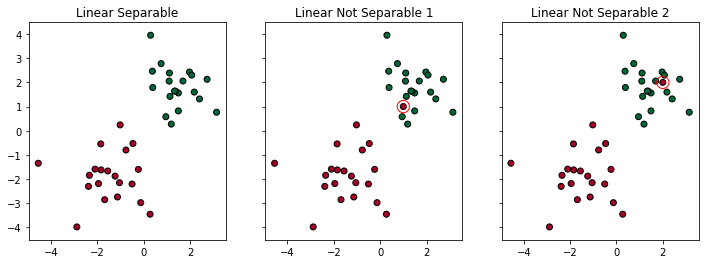

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),sharey=True) # setting up the graph ax1, ax2, ax3

# plotting X. X[:,0] is row and X[:,1] is column
ax1.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn',
                edgecolors='k')

ax1.set_title('Linear Separable')

ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax2.scatter(1, 1, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax2.set_title('Linear Not Separable 1')

ax3.scatter(X_new2[:, 0], X_new2[:, 1], c=Y_new2, zorder=10, cmap='RdYlGn',
                edgecolors='k')
ax3.scatter(2, 2, s=150, facecolors='none', zorder=10, 
            edgecolors='r')

ax3.set_title('Linear Not Separable 2')

w [0.96176981 0.50883184]


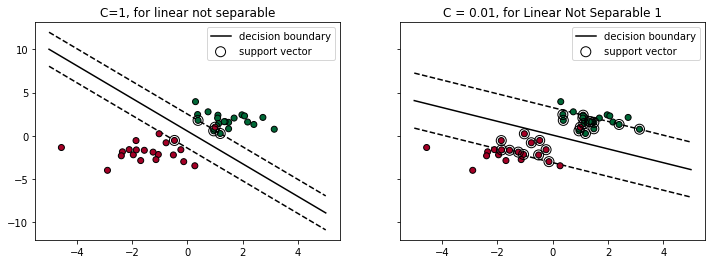

In [21]:
# Degree of Tolerance Demo 

f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), sharey =True)

# fit svm
clf = svm.SVC(kernel="linear", C = 1)
clf.fit(X_new, Y_new)

# getting separated hyperplane

w = clf.coef_[0] # weight assigned to features.
a = -w[0] / w[1]
print('w', w)
xx=np.linspace(-5,5)
yy = a*xx - (clf.intercept_[0])/w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plotting the original X 
ax1.scatter(X_new[:, 0], X_new[:,1], c=Y_new, zorder=10, cmap="RdYlGn", edgecolors='k')

#plot decision boundary
ax1.plot(xx,yy, 'k-', label = 'decision boundary')
# k is the line, the dash mean a straight line

# plot margin 
# k dash dash means dashing line
ax1.plot(xx, yy_down, 'k--') # down margin
ax1.plot(xx, yy_up, 'k--') #upper margin

# plot support vector
ax1.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:, 1],
           s=100, facecolors='none', zorder=10, edgecolors='k',
           label='support vector')
ax1.set_title('C=1, for linear not separable')
ax1.legend() # attach label to graph as legend

# fit svm 
clf2 = svm.SVC(kernel='linear', C=0.01)
clf2.fit(X_new, Y_new)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# get margin
margin = 1 / np.sqrt(np.sum(clf2.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot dot
ax2.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap='RdYlGn',
                edgecolors='k')
# plot decision boundary
ax2.plot(xx, yy, 'k-', label = 'decision boundary')
# plot margin
ax2.plot(xx, yy_down, 'k--')
ax2.plot(xx, yy_up, 'k--')
# plot support vector
ax2.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
                facecolors='none', zorder=10, edgecolors='k',label = 'support vector')

ax2.set_title('C = 0.01, for Linear Not Separable 1')

ax2.legend()


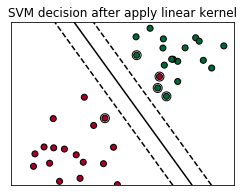

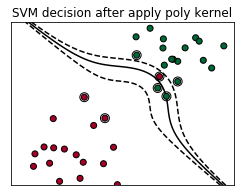

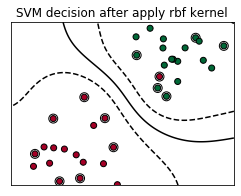

In [33]:
# Demo Linear, Poly, RBF, kernel 

fignum = 1 # set the figure number

# fit model

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel = kernel, gamma = 'auto')
    clf.fit(X_new, Y_new)
    
    # plotting the line, points, and nearest vectors
    plt.figure(fignum, figsize=(4,3))
    plt.clf()
    
    
    plt.scatter(clf.support_vectors_[:,0], # plotting rows 
                clf.support_vectors_[:,1], # plotting columns
                s=80, facecolors='none', zorder=10,
               edgecolors='k')
    
    plt.scatter(X_new[:,0], X_new[:,1], 
                c=Y_new, # Color 
                zorder=10, cmap='RdYlGn',
                edgecolors='k')
    plt.axis('tight')
    
    #figure this part out
    #start 
    x_min=-3
    x_max=3
    y_min=-3
    y_max=3
    
    XX, YY = np.mgrid[x_min:x_max:200j, 
                      y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4,3))
    
    plt.contour(XX, YY, Z, colors=['k','k','k'], 
                linestyles=['--','-','--'],
                levels=[-.5,0,0.5])
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())
    
    plt.title("SVM decision after apply %s kernel" %kernel)
    
    fignum += 1
    
plt.show()
    
    
    